In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x = dataset.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# K-Means Cluster

In [4]:
from sklearn.cluster import KMeans

C:\Users\yasho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


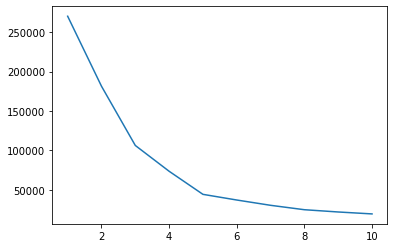

In [5]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #inertia means centroid
plt.plot(range(1,11), wcss)

In [6]:
#As per this concept k=5
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
kmeans

KMeans(n_clusters=5)

In [7]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [8]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
dataset_combind = pd.concat([dataset, pd.DataFrame(y_kmeans)], axis=1)
dataset_combind.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
5,6,Female,22,17,76,4
6,7,Female,35,18,6,3
7,8,Female,23,18,94,4
8,9,Male,64,19,3,3
9,10,Female,30,19,72,4


In [10]:
len(dataset_combind)

200

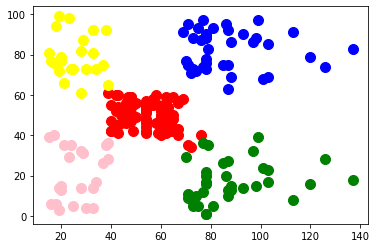

In [11]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s = 100, c='red',label ='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s = 100, c='blue',label ='Cluster2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],s = 100, c='green',label ='Cluster3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1],s = 100, c='pink',label ='Cluster4')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1],s = 100, c='yellow',label ='Cluster5')

plt.show()

In [12]:
dataset_combind.to_csv('New_Cluster_Analysis.csv')

# Hierarchical Clustering

In [13]:
import scipy.cluster.hierarchy as sch

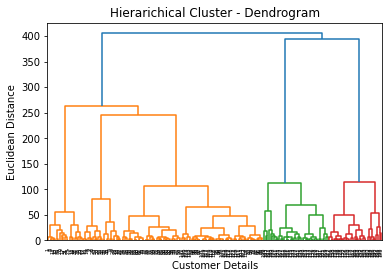

In [14]:
dendrogram = sch.dendrogram(sch.linkage(x, method ='ward')) #ward is the minimum distance.
plt.title("Hierarichical Cluster - Dendrogram")
plt.xlabel("Customer Details")
plt.ylabel("Euclidean Distance")
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
#taking the no. of cluster is 5 as same as above method
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

In [17]:
y_hc = hc.fit_predict(x)
y_hc 

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [18]:
combined_1 = pd.concat([dataset,pd.DataFrame(y_hc)], axis=1)
combined_1.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


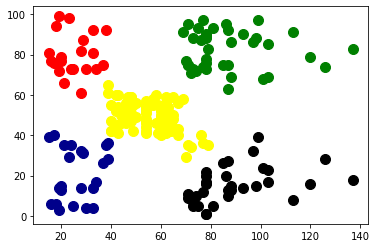

In [19]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1],s=100,c='black',label='H_Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1],s=100,c='yellow',label='H_Cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1],s=100,c='green',label='H_Cluster3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1],s=100,c='red',label='H_Cluster4')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1],s=100,c='darkblue',label='H_Cluster5')

In [20]:
combined_1.to_csv("H_Cluster.csv")